<a href="https://colab.research.google.com/github/w21280485/assignment_a2_2/blob/main/Code_Development_Notebook_Wong21280485.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load the Dataset

In [5]:
# Import libraries and Load the Dataset
import sqlite3
import pandas as pd

In [6]:
# Establish the connection to the database

connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

In [7]:
# Inspect the database schema and find out what tables exist

sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('medical_examination',)]

In [8]:
# Load the table into Pandas dataframe

sql='''
SELECT * from medical_examination;
'''
df = pd.read_sql_query(sql, connection)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Data Exploration

In [9]:
# Display the first few rows of the dataset using head()

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [10]:
# Display the bottom few rows of the dataset using tail()

df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [11]:
# Get general information about the dataset using info()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
# Summary statistics of numerical columns using describle()

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Discussion

Above statistics indicate that the max value of gender is 3, which is not the same in the assignment description. Handling of unknown dataset is required in the follow section.

## Pre-processing and cleaning data

### Check for unknown values

In [13]:
# Display all the rows with gender = 3 using sql

sql='''
SELECT * from medical_examination WHERE gender = 3
'''
df = pd.read_sql_query(sql, connection)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2171,18395,3,159,77.0,140,100,1,1,0,0,1,1
1,2769,17458,3,155,50.0,90,50,1,1,0,0,1,0
2,3898,20376,3,158,58.0,130,80,1,1,0,0,1,0
3,13328,23228,3,156,69.0,140,80,3,1,0,0,1,1
4,36717,18422,3,158,73.0,110,80,1,1,0,0,1,0
5,37141,21977,3,165,80.0,120,80,1,1,0,0,1,0
6,37608,19686,3,165,68.0,120,80,1,1,0,0,1,0
7,37757,21882,3,163,74.0,150,100,2,1,0,0,0,1
8,62308,22536,3,148,86.0,120,80,1,1,0,0,1,0
9,89890,19882,3,169,72.0,130,90,1,1,0,0,1,1


#### Discussion

Above result indicate that there are 11 rows with gender = 3. Given that the volume is small compare to total 70000 rows of data, these 11 rows will not be selected when doing data analysis.

We can do it by adding a condiction WHERE gender = 1 OR gender = 2 in the SQL query.


### Check for duplicate rows

In [14]:
# Check for duplicates using duplicated()
sql='''
SELECT * from medical_examination
'''
df = pd.read_sql_query(sql, connection)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

--> Above result indicate that there are no duplicate rows for the first few rows and bottom few rows, but the middle rows cannot be seen. So I try to display the duplicate rows to make sure if no duplicate.

In [15]:
# Try to display duplicate rows

df[df.duplicated()]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


#### Discussion

Above result indicate that there are no duplicate rows. As such, checking duplicate process is done and no need to remove any duplicate values

### Check for missing values

In [16]:
# Check for missing values using isnull()

df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [17]:
# Check for missing values in each row

(df[df['id'].isnull()])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


#### Discussion

Above result indicate there are no missing value. As such, checking for missing value is done and no need to handle (remove or impute) missing value.

###Load filtered Dataset

In [18]:
# load table into dataframe !!only select gender = 1 OR 2 to exclude unknown gender!!
sql='''
SELECT * from medical_examination WHERE gender = 1 OR gender = 2;
'''
df = pd.read_sql_query(sql, connection)

### Replace values with meaningful labels

In [19]:
# use the info provided in assignment guideline to replace values
df['gender'].replace(to_replace=[1,2,3], value=['Female','Male','Unknown'], inplace=True)
df['cholesterol'].replace(to_replace=[1,2,3], value=['Normal','Above normal', 'Well above normal'], inplace=True)
df['gluc'].replace(to_replace=[1,2,3], value=['Normal','Above normal', 'Well above normal'], inplace=True)
df['smoke'].replace(to_replace=[0,1], value=['Non-smoker', 'Smoker'], inplace=True)
df['alco'].replace(to_replace=[0,1], value=['Non-smoker', 'Smoker'], inplace=True)
df['active'].replace(to_replace=[0,1], value=['Inactive', 'Active'], inplace=True)
df['cardio'].replace(to_replace=[0,1], value=['No','Yes'], inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168,62.0,110,80,Normal,Normal,Non-smoker,Non-smoker,Active,No
1,1,20228,Female,156,85.0,140,90,Well above normal,Normal,Non-smoker,Non-smoker,Active,Yes
2,2,18857,Female,165,64.0,130,70,Well above normal,Normal,Non-smoker,Non-smoker,Inactive,Yes
3,3,17623,Male,169,82.0,150,100,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
4,4,17474,Female,156,56.0,100,60,Normal,Normal,Non-smoker,Non-smoker,Inactive,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,99993,19240,Male,168,76.0,120,80,Normal,Normal,Smoker,Non-smoker,Active,No
69985,99995,22601,Female,158,126.0,140,90,Above normal,Above normal,Non-smoker,Non-smoker,Active,Yes
69986,99996,19066,Male,183,105.0,180,90,Well above normal,Normal,Non-smoker,Smoker,Inactive,Yes
69987,99998,22431,Female,163,72.0,135,80,Normal,Above normal,Non-smoker,Non-smoker,Inactive,Yes


##Data Analysis

### Data Analysis 1: Cardiovascular Health by Gender

####  Distribution of cardio diseases within each gender category

In [20]:
# Calculate the count of cardio diseases among all genders to understand cardio distribution
cardio_counts = df['cardio'].value_counts()

# Display the resulting DataFrame
cardio_counts

No     35014
Yes    34975
Name: cardio, dtype: int64

In [21]:
# Calculate the count of cardio diseases by gender to understand gender distribution
gender_counts = df['gender'].value_counts()

# Display the resulting DataFrame
gender_counts

Female    45522
Male      24467
Name: gender, dtype: int64

In [22]:
# Group the data by Cardio and Gender
grouped_cardio_gender = df.groupby(['gender','cardio'])
grouped_cardio_gender

# Calculate the count for each group
cardio_gender_counts = grouped_cardio_gender.size()

# Display the resulting DataFrame
cardio_gender_counts

gender  cardio
Female  No        22909
        Yes       22613
Male    No        12105
        Yes       12362
dtype: int64

In [23]:
# Reshape the result to have cardio as rows and gender as columns
cardio_gender_counts = cardio_gender_counts.unstack()

# Display the resulting DataFrame
cardio_gender_counts

cardio,No,Yes
gender,,
Female,22909,22613
Male,12105,12362


####Visualising the distribution

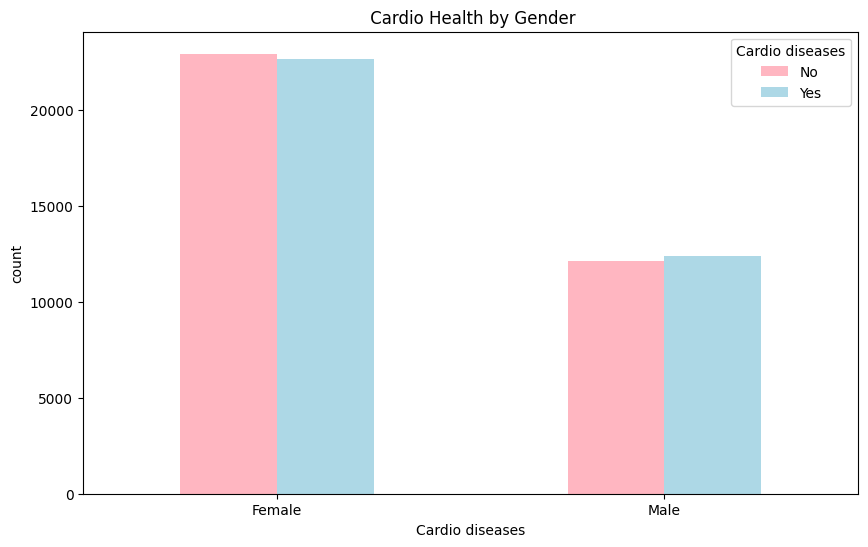

In [24]:
# Import library
import matplotlib.pyplot as plt

# Create a group bar chart
cardio_gender_counts.plot(kind='bar', figsize=(10, 6), color=('lightpink','lightblue'))
plt.title(' Cardio Health by Gender')
plt.xlabel('Cardio diseases')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='Cardio diseases')

# Display the plot
plt.show()


###Data Analysis 2: Cardiovascular Health by BMI

####Distribution of cardio diseases within each BMI category

In [25]:
# Calculate bmi to understand bmi distribution
bmi_count = df['weight']/((df['height']**2/10000))          # bmi = weight(kg) / height(m)2
bmi_count

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69984    26.927438
69985    50.472681
69986    31.353579
69987    27.099251
69988    24.913495
Length: 69989, dtype: float64

In [26]:
# round the number to 2 decimal places
bmi_count = bmi_count.round(1)
bmi_count

0        22.0
1        34.9
2        23.5
3        28.7
4        23.0
         ... 
69984    26.9
69985    50.5
69986    31.4
69987    27.1
69988    24.9
Length: 69989, dtype: float64

In [27]:
# group bmi by groups: underweight = less than 18.5 ; healthy weight = 18.5-24.9 ; overweight = 25-29.9 ; obese = 30 or more

# Define the custom BMI ranges and labels
bins = [0,18.5, 25, 30, 1000]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Use pd.cut to categorize the BMI values
bmi_cat = pd.cut(bmi_count, bins=bins, labels=labels, right=False)
print(bmi_cat)

0        Healthy Weight
1                 Obese
2        Healthy Weight
3            Overweight
4        Healthy Weight
              ...      
69984        Overweight
69985             Obese
69986             Obese
69987        Overweight
69988    Healthy Weight
Length: 69989, dtype: category
Categories (4, object): ['Underweight' < 'Healthy Weight' < 'Overweight' < 'Obese']


In [28]:
# Group the data by Cardio and bmi_cat
grouped_cardio_bmi = df.groupby([bmi_cat,'cardio'])
grouped_cardio_bmi

# Calculate the count for each group
cardio_bmi_counts = grouped_cardio_bmi.size()

# Display the resulting DataFrame
cardio_bmi_counts

                cardio
Underweight     No          449
                Yes         180
Healthy Weight  No        15131
                Yes       10082
Overweight      No        12546
                Yes       12994
Obese           No         6888
                Yes       11719
dtype: int64

In [29]:
# Reshape the result to have cardio as rows and gender as columns
cardio_bmi_counts = cardio_bmi_counts.unstack()

# Display the resulting DataFrame
cardio_bmi_counts

cardio,No,Yes
Underweight,449,180
Healthy Weight,15131,10082
Overweight,12546,12994
Obese,6888,11719


####Visualising the distribution

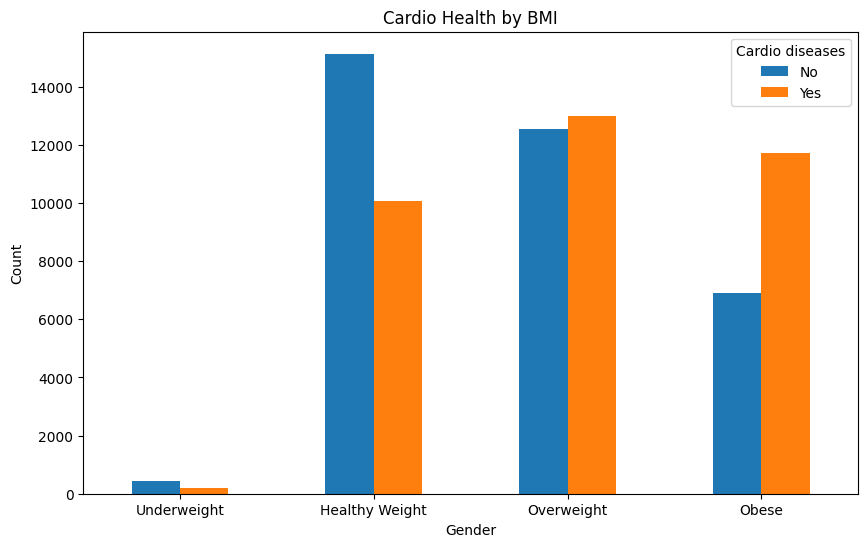

In [30]:
# Create a grouped bar chart
ax = cardio_bmi_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Cardio Health by BMI')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cardio diseases', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Display the plot
plt.show()

###Data Analysis 3: Relationship between BMI and Cholesterol among Cardio diseases

####Distribution of BMI category and Cholesterol

In [31]:
# select data where cardio diseases = YES only
df = df[df['cardio'] == 'Yes']
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,Female,156,85.0,140,90,Well above normal,Normal,Non-smoker,Non-smoker,Active,Yes
2,2,18857,Female,165,64.0,130,70,Well above normal,Normal,Non-smoker,Non-smoker,Inactive,Yes
3,3,17623,Male,169,82.0,150,100,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
7,12,22584,Male,178,95.0,130,90,Well above normal,Well above normal,Non-smoker,Non-smoker,Active,Yes
15,24,16782,Male,172,112.0,120,80,Normal,Normal,Non-smoker,Non-smoker,Inactive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,99991,19699,Female,172,70.0,130,90,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
69983,99992,21074,Female,165,80.0,150,80,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
69985,99995,22601,Female,158,126.0,140,90,Above normal,Above normal,Non-smoker,Non-smoker,Active,Yes
69986,99996,19066,Male,183,105.0,180,90,Well above normal,Normal,Non-smoker,Smoker,Inactive,Yes


In [32]:
# Calculate bmi
bmi_count_w_cardiodis = df['weight']/((df['height']**2/10000))          # bmi = weight(kg) / height(m)2
bmi_count_w_cardiodis

# round the number to 2 decimal places
bmi_count_w_cardiodis = bmi_count_w_cardiodis.round(1)
bmi_count_w_cardiodis

1        34.9
2        23.5
3        28.7
7        30.0
15       37.9
         ... 
69982    23.7
69983    29.4
69985    50.5
69986    31.4
69987    27.1
Length: 34975, dtype: float64

In [33]:
# group bmi by groups: underweight = less than 18.5 ; healthy weight = 18.5-24.9 ; overweight = 25-29.9 ; obese = 30 or more

# Define the custom BMI ranges and labels
bins = [0,18.5, 25, 30, 100]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Use pd.cut to categorize the BMI values
bmi_w_cardiodis_cat = pd.cut(bmi_count_w_cardiodis, bins=bins, labels=labels, right=False)
print(bmi_w_cardiodis_cat)

1                 Obese
2        Healthy Weight
3            Overweight
7                 Obese
15                Obese
              ...      
69982    Healthy Weight
69983        Overweight
69985             Obese
69986             Obese
69987        Overweight
Length: 34975, dtype: category
Categories (4, object): ['Underweight' < 'Healthy Weight' < 'Overweight' < 'Obese']


In [34]:
# display the count of cholesterol
df['cholesterol']

1        Well above normal
2        Well above normal
3                   Normal
7        Well above normal
15                  Normal
               ...        
69982               Normal
69983               Normal
69985         Above normal
69986    Well above normal
69987               Normal
Name: cholesterol, Length: 34975, dtype: object

In [35]:
# Group the data by BMI & cholesterol
grouped_bmi_chole = df.groupby([bmi_w_cardiodis_cat,'cholesterol'])

# Calculate the count for each group
bmi_chole_counts = grouped_bmi_chole.size()

# Display the resulting DataFrame
bmi_chole_counts

                cholesterol      
Underweight     Above normal           28
                Normal                130
                Well above normal      22
Healthy Weight  Above normal         1316
                Normal               7482
                Well above normal    1284
Overweight      Above normal         2155
                Normal               8715
                Well above normal    2124
Obese           Above normal         2250
                Normal               6715
                Well above normal    2741
dtype: int64

In [36]:
# Reshape the result to have cardio as rows and gender as columns
bmi_chole_counts = bmi_chole_counts.unstack()

# Display the resulting DataFrame
bmi_chole_counts


cholesterol,Above normal,Normal,Well above normal
Underweight,28,130,22
Healthy Weight,1316,7482,1284
Overweight,2155,8715,2124
Obese,2250,6715,2741


In [37]:
# reorder the cholesterol category
bmi_chole_counts = bmi_chole_counts.loc[:,['Normal','Above normal','Well above normal']]

# Display the resulting DataFrame
bmi_chole_counts

cholesterol,Normal,Above normal,Well above normal
Underweight,130,28,22
Healthy Weight,7482,1316,1284
Overweight,8715,2155,2124
Obese,6715,2250,2741


####Visualising the distribution

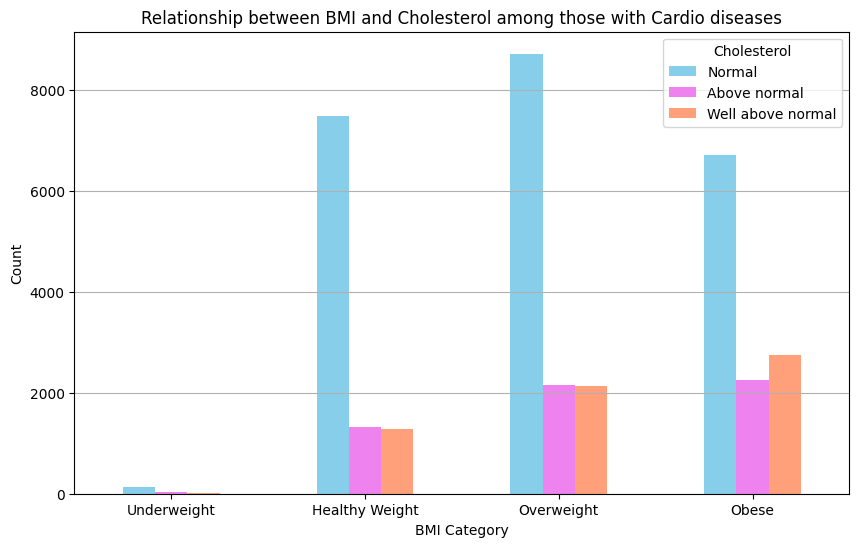

In [38]:
# Create a grouped bar chart
ax = bmi_chole_counts.plot(kind='bar', figsize=(10, 6),color=('skyblue','violet','lightsalmon' ))
plt.title('Relationship between BMI and Cholesterol among those with Cardio diseases')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Cholesterol', loc='upper right', labels=['Normal', 'Above normal','Well above normal'])
plt.xticks(rotation=0)
plt.grid(axis = 'y')

# Display the plot
plt.show()

###Data Analysis 4: Connection between Smoking and Physical activity among Cardio diseases

####Distribution of Smoking and Physical activity

In [39]:
# select data where cardio diseases = YES only
df = df[df['cardio'] == 'Yes']
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,Female,156,85.0,140,90,Well above normal,Normal,Non-smoker,Non-smoker,Active,Yes
2,2,18857,Female,165,64.0,130,70,Well above normal,Normal,Non-smoker,Non-smoker,Inactive,Yes
3,3,17623,Male,169,82.0,150,100,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
7,12,22584,Male,178,95.0,130,90,Well above normal,Well above normal,Non-smoker,Non-smoker,Active,Yes
15,24,16782,Male,172,112.0,120,80,Normal,Normal,Non-smoker,Non-smoker,Inactive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,99991,19699,Female,172,70.0,130,90,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
69983,99992,21074,Female,165,80.0,150,80,Normal,Normal,Non-smoker,Non-smoker,Active,Yes
69985,99995,22601,Female,158,126.0,140,90,Above normal,Above normal,Non-smoker,Non-smoker,Active,Yes
69986,99996,19066,Male,183,105.0,180,90,Well above normal,Normal,Non-smoker,Smoker,Inactive,Yes


In [40]:
# display the count of smoking

df['smoke']

1        Non-smoker
2        Non-smoker
3        Non-smoker
7        Non-smoker
15       Non-smoker
            ...    
69982    Non-smoker
69983    Non-smoker
69985    Non-smoker
69986    Non-smoker
69987    Non-smoker
Name: smoke, Length: 34975, dtype: object

In [41]:
# display the count of physical activity

df['active']

1          Active
2        Inactive
3          Active
7          Active
15       Inactive
           ...   
69982      Active
69983      Active
69985      Active
69986    Inactive
69987    Inactive
Name: active, Length: 34975, dtype: object

In [42]:
# Group the data by smoking & activity
grouped_smoke_active = df.groupby(['smoke','active'])
grouped_smoke_active

# Calculate the count for each group
smoke_active_counts = grouped_smoke_active.size()

# Display the resulting DataFrame
smoke_active_counts

smoke       active  
Non-smoker  Active      25244
            Inactive     6802
Smoker      Active       2371
            Inactive      558
dtype: int64

In [43]:
# Reshape the result to have cardio as rows and gender as columns
smoke_active_counts = smoke_active_counts.unstack()

# Display the resulting DataFrame
smoke_active_counts

active,Active,Inactive
smoke,,
Non-smoker,25244,6802
Smoker,2371,558


####Visualising the distribution

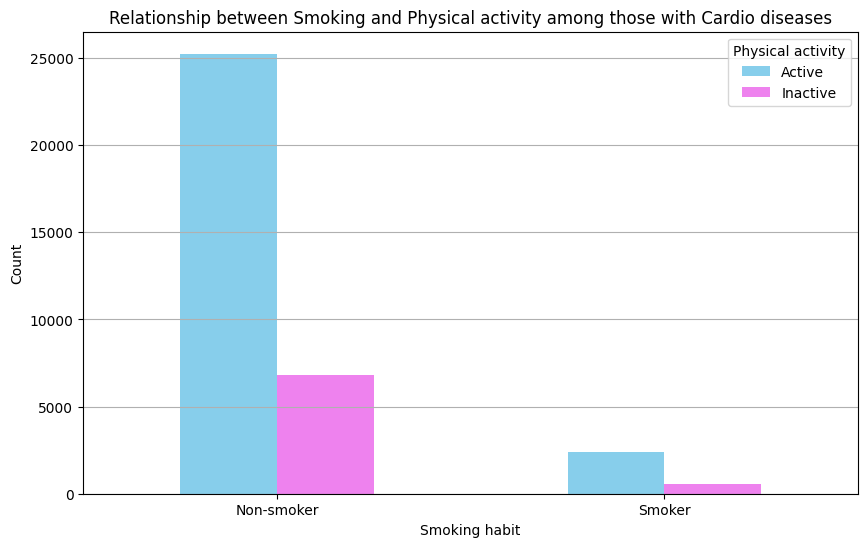

In [44]:
# Create a grouped bar chart
ax = smoke_active_counts.plot(kind='bar', figsize=(10, 6),color=('skyblue','violet','lightsalmon' ))
plt.title('Relationship between Smoking and Physical activity among those with Cardio diseases')
plt.xlabel('Smoking habit')
plt.ylabel('Count')
plt.legend(title='Physical activity', loc='upper right', labels=['Active','Inactive'])
plt.xticks(rotation=0)
plt.grid(axis = 'y')

# Display the plot
plt.show()

##Testing the solution

In [45]:
# testing onsubsets to verify the duplication checking

# select all data from table
sql='''
SELECT * from medical_examination
'''
df = pd.read_sql_query(sql, connection)

# Display duplicate rows for subsets to cross-check the dataset
df[df.duplicated(subset=["age", "gender", "height", "weight", 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke','alco', 'active', 'cardio'])]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,15094,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,54977,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,60642,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,63776,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,64445,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,65352,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,65438,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,69842,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [49]:
# Further select one of the duplicated row to verity
# for the first duplicated row id = 15094, select all with the same condition:
sql='''
SELECT * from medical_examination WHERE age = 20495 AND gender = 1 AND height = 165 AND weight = 70
'''
df_duplicate = pd.read_sql_query(sql, connection)
df_duplicate

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,3247,20495,1,165,70.0,120,80,1,1,0,0,1,0
1,15094,20495,1,165,70.0,120,80,1,1,0,0,1,0


Above result indicate that there are duplicate rows for the subsets excluding 'id', which make sense that all the ids are unique and there are some individuals having same values in other columns.

As such, duplication checking process is verified.

## Reference

1. Below website is used for searching how to check duplicate in subset columns:

https://www.w3schools.com/python/pandas/ref_df_duplicated.asp


2. Below website is used for searching how to replace value in columns:

https://www.geeksforgeeks.org/python-pandas-dataframe-replace/

3. I acknowledge ChatGPT for the assistance of identifying some of the syntax errors and logic errors during the coding process.
